In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


In [2]:
import tensorflow as tf
np.random.seed(777)
tf.random.set_seed(777)

2025-11-21 02:51:37.180857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763693497.605548      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763693497.721806      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [3]:
train_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_train.csv', header=None)
test_df = pd.read_csv('/kaggle/input/heartbeat/mitbih_test.csv', header=None)

In [4]:
print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")

Training set shape: (87554, 188)
Test set shape: (21892, 188)


In [5]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

print(f"\n📊 Data Shapes:")
print(f"   X_train: {X_train.shape}")
print(f"   y_train: {y_train.shape}")
print(f"   X_test: {X_test.shape}")
print(f"   y_test: {y_test.shape}")


📊 Data Shapes:
   X_train: (87554, 187)
   y_train: (87554,)
   X_test: (21892, 187)
   y_test: (21892,)


In [6]:
print(train_df.head())

        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0 


**Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]**

**N (0): Normal beat, including beats like left/right bundle branch block or atrial/nodal escape beats.**

**S (1): Supraventricular ectopic beat, such as an atrial premature beat.**

**V (2): Ventricular ectopic beat, including a premature ventricular contraction.**

**F (3): Fusion beat, which is a mix of a normal and a ventricular beat.**

**Q (4): Unclassifiable or unknown beat, which may include paced beats.**


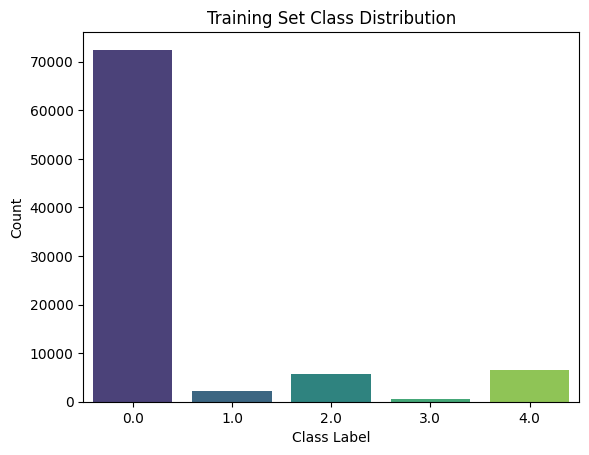

In [7]:
#Label Distribution - Train

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train, palette="viridis")
plt.title("Training Set Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

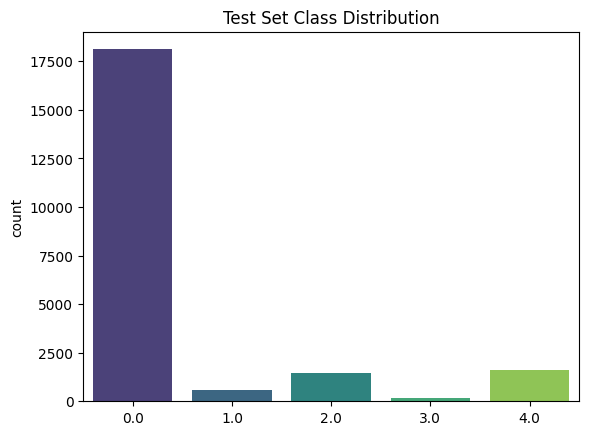

In [8]:
#Label Distribution - Test

sns.countplot(x=y_test, palette="viridis")
plt.title("Test Set Class Distribution")
plt.show()

In [9]:
import pandas as pd

pd.Series(y_train).value_counts().sort_index()

class_counts = pd.Series(y_train).value_counts().sort_index()
for c, cnt in class_counts.items():
    print(f"Class {c}: {cnt} samples")


Class 0.0: 72471 samples
Class 1.0: 2223 samples
Class 2.0: 5788 samples
Class 3.0: 641 samples
Class 4.0: 6431 samples


In [10]:
import pandas as pd

pd.Series(y_test).value_counts().sort_index()

class_counts = pd.Series(y_test).value_counts().sort_index()
for c, cnt in class_counts.items():
    print(f"Class {c}: {cnt} samples")


Class 0.0: 18118 samples
Class 1.0: 556 samples
Class 2.0: 1448 samples
Class 3.0: 162 samples
Class 4.0: 1608 samples


In [11]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,87554.0,0.890360,0.240909,0.0,0.921922,0.991342,1.000000,1.0
1,87554.0,0.758160,0.221813,0.0,0.682486,0.826013,0.910506,1.0
2,87554.0,0.423972,0.227305,0.0,0.250969,0.429472,0.578767,1.0
3,87554.0,0.219104,0.206878,0.0,0.048458,0.166000,0.341727,1.0
4,87554.0,0.201127,0.177058,0.0,0.082329,0.147878,0.258993,1.0
...,...,...,...,...,...,...,...,...
183,87554.0,0.003471,0.036255,0.0,0.000000,0.000000,0.000000,1.0
184,87554.0,0.003221,0.034789,0.0,0.000000,0.000000,0.000000,1.0
185,87554.0,0.002945,0.032865,0.0,0.000000,0.000000,0.000000,1.0
186,87554.0,0.002807,0.031924,0.0,0.000000,0.000000,0.000000,1.0


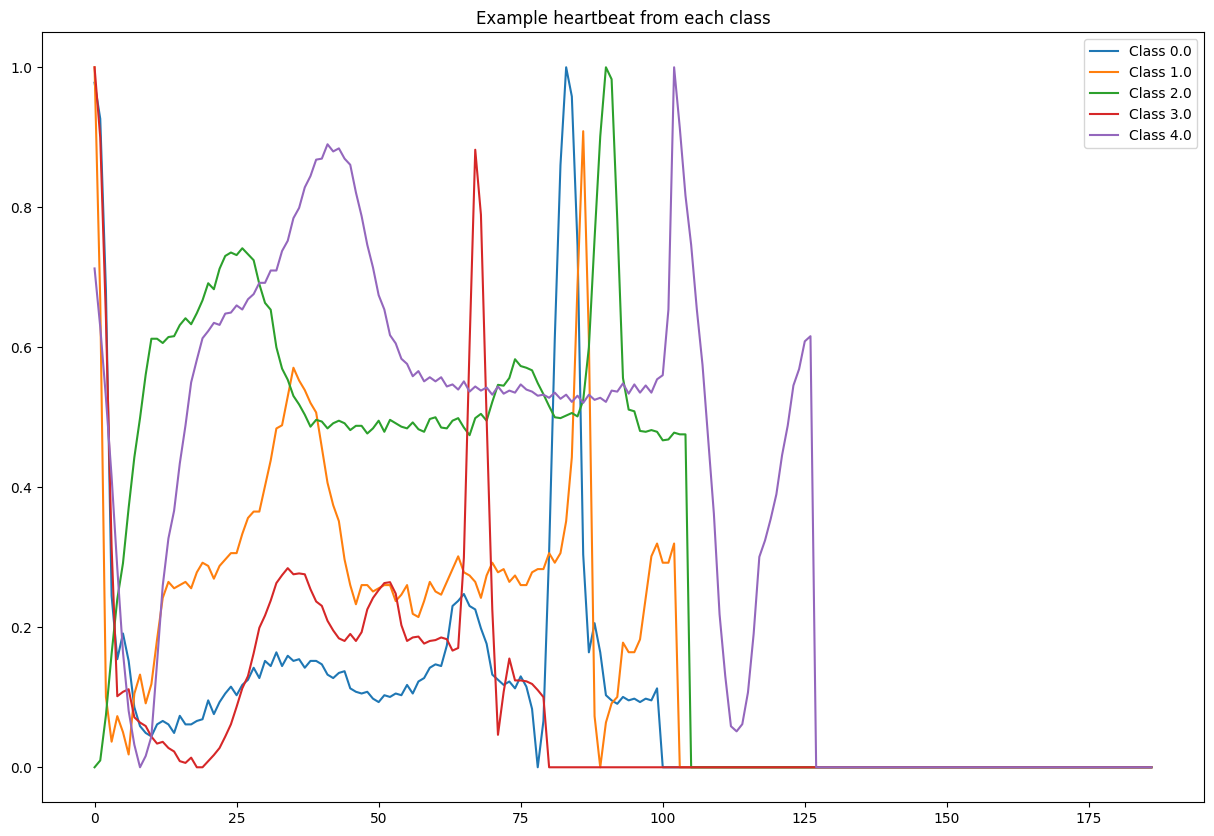

In [12]:
#Visulaizing heartbeats

plt.figure(figsize=(15,10))

for cls in sorted(np.unique(y_train)):
    sample = X_train[y_train == cls][0]
    plt.plot(sample, label=f"Class {cls}")

plt.title("Example heartbeat from each class")
plt.legend()
plt.show()


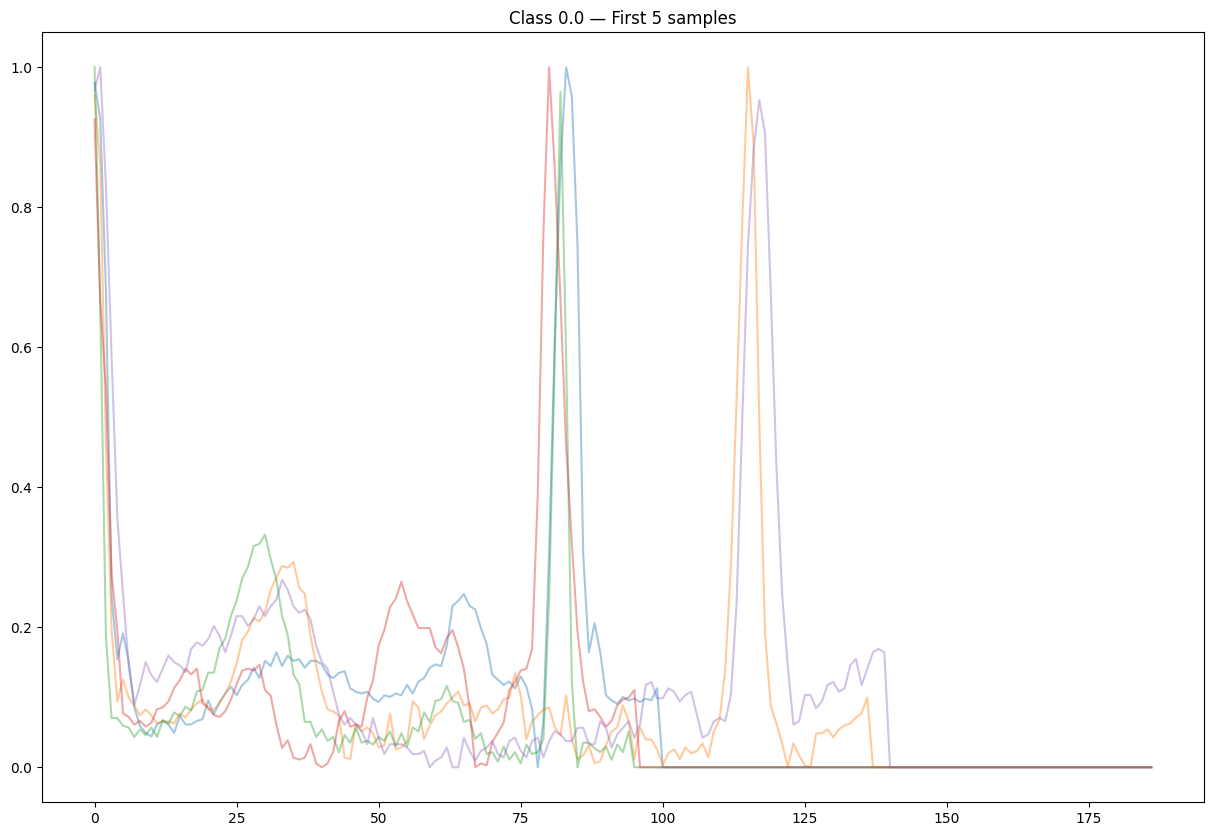

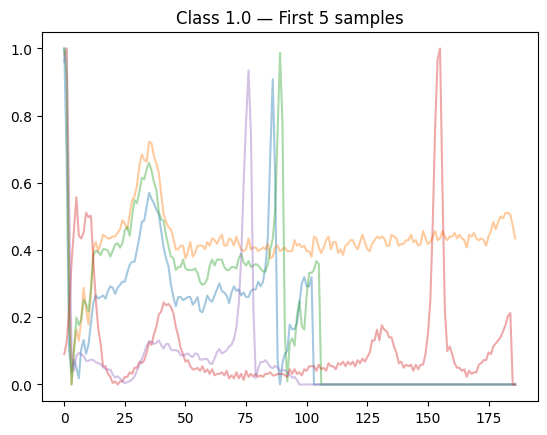

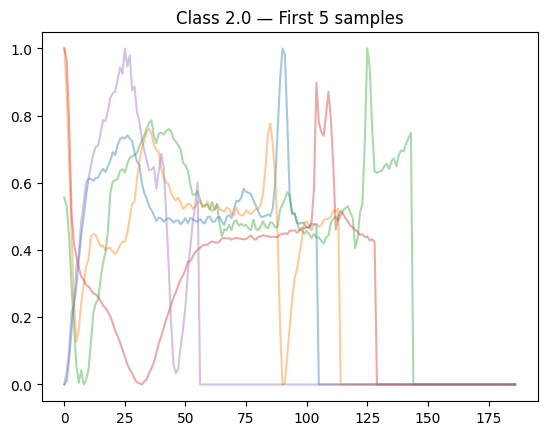

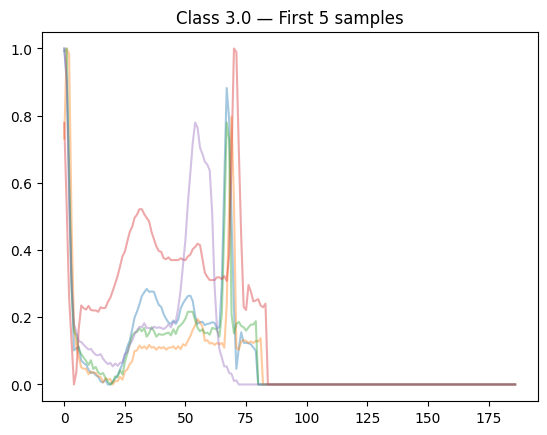

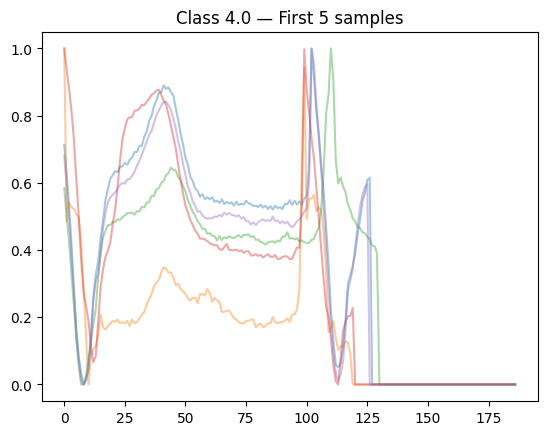

In [13]:
#First 5 samples for each class

plt.figure(figsize=(15,10))

for cls in sorted(np.unique(y_train)):
    subset = X_train[y_train == cls][:5]  # first 5
    for s in subset:
        plt.plot(s, alpha=0.4)
    plt.title(f"Class {cls} — First 5 samples")
    plt.show()

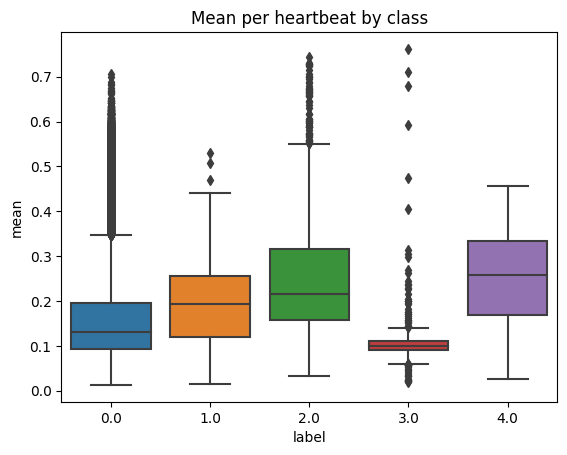

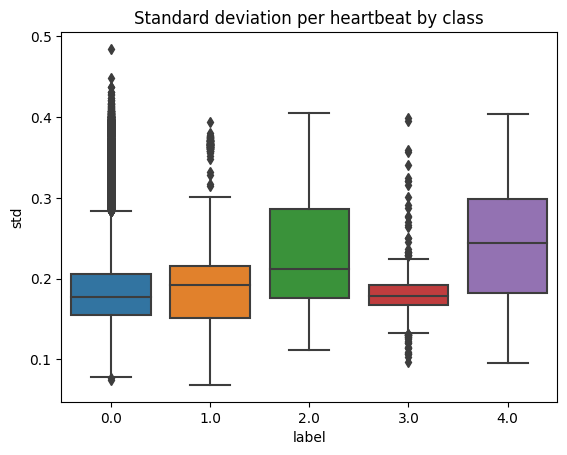

In [14]:
#Signal Mean and Variance per Row

row_means = X_train.mean(axis=1)
row_stds = X_train.std(axis=1)

stats_df = pd.DataFrame({"mean": row_means, "std": row_stds, "label": y_train})

sns.boxplot(data=stats_df, x="label", y="mean")
plt.title("Mean per heartbeat by class")
plt.show()

sns.boxplot(data=stats_df, x="label", y="std")
plt.title("Standard deviation per heartbeat by class")
plt.show()

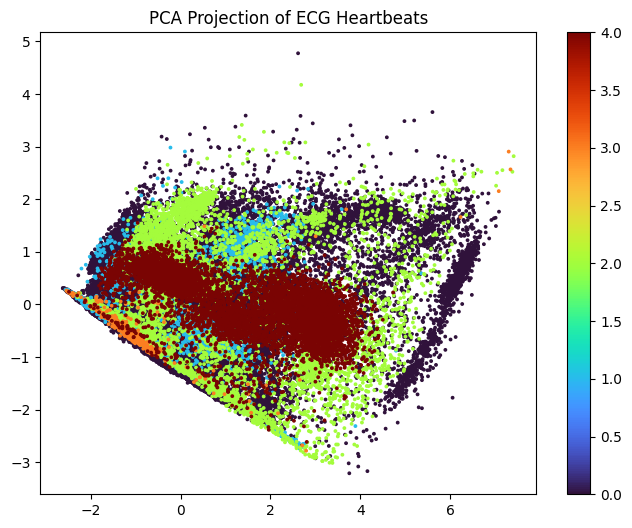

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, s=3, cmap="turbo")
plt.title("PCA Projection of ECG Heartbeats")
plt.colorbar()
plt.show()


In [16]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=5000, multi_class='multinomial')
lr.fit(X_train, y_train)

preds = lr.predict(X_test)
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     18118
         1.0       0.84      0.38      0.53       556
         2.0       0.66      0.33      0.44      1448
         3.0       0.58      0.30      0.40       162
         4.0       0.97      0.88      0.92      1608

    accuracy                           0.91     21892
   macro avg       0.79      0.58      0.65     21892
weighted avg       0.90      0.91      0.90     21892



In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[17864    28   196     8    22]
 [  314   214    28     0     0]
 [  905    14   476    28    25]
 [  105     0     8    49     0]
 [  180     0    18     0  1410]]


**(Dataset) Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]**

**N (0): dominates the dataset; majority in the dataset**

**S (1): The model can recognize some Class 1 beats, but it misses nearly half of them**

**V (2): Only 1 in 3 ventricular beats are detected; Dangerous in real-life diagnosis**

**F (3): Almost all fusion beats are misclassified; Very few samples**

**Q (4): Performance looks high due to small sample size**


**Class 3 (fusion beats) is extremely underrepresented in both the training set (641 samples) and test set (162 samples), making it the smallest class by a wide margin (<1% of the dataset). This severe class imbalance explains the poor recall for Class 3 in the logistic regression baseline and highlights the need for oversampling or class-weighting when training deep learning models.**
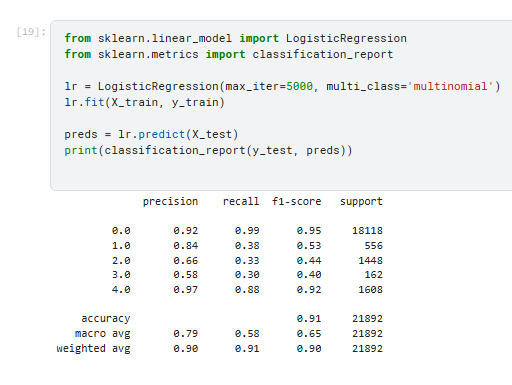